In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [0]:
data=pd.read_csv('drive/My Drive/Colab Notebooks/time_series_covid19_confirmed_global.csv')

In [44]:
Canada=data[data['Country/Region'].isin(['Canada'])]
Canada=Canada.drop(['Province/State','Country/Region','Lat','Long'],axis=1)
Canada_nd=Canada.values
Canada_sum=Canada_nd.sum(axis=0)
Canada_sum=Canada_sum.reshape(1,80)

array([[    0,     0,     0,     0,     1,     1,     2,     2,     2,
            4,     4,     4,     4,     4,     5,     5,     7,     7,
            7,     7,     7,     7,     7,     7,     7,     7,     8,
            8,     8,     8,     9,     9,     9,    10,    11,    11,
           13,    14,    20,    24,    27,    30,    33,    37,    49,
           54,    64,    77,    79,   108,   117,   193,   198,   252,
          415,   478,   657,   800,   943,  1277,  1469,  2088,  2790,
         3251,  4042,  4682,  5576,  6280,  7398,  8527,  9560, 11284,
        12437, 12978, 15756, 16563, 17872, 19141, 20654, 22059]])

In [0]:
X,Y = [], []
for i in range(77):
    X.append(Canada_sum[0,i:i+3])
    Y.append(Canada_sum[0,i+3])
X=np.array(X)
Y=np.array(Y)



In [53]:
X_Train = np.reshape(X, (X.shape[0],X.shape[1],1))

(77,)

In [0]:
def create_model():
  model = Sequential()
  model.add(LSTM(50,input_shape=(3,1),return_sequences=True,activation='relu'))
  model.add(LSTM(100,activation='relu'))

  model.add(Dense(1))
  return model

In [58]:
model=create_model( )
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_Train,Y, epochs=200, verbose=1)

Epoch 1/200
77/77 [==============================] - 1s 10ms/step - loss: 40736018.1818
Epoch 2/200
77/77 [==============================] - 0s 230us/step - loss: 39316571.8701
Epoch 3/200
77/77 [==============================] - 0s 229us/step - loss: 38420995.0130
Epoch 4/200
77/77 [==============================] - 0s 223us/step - loss: 37019703.8961
Epoch 5/200
77/77 [==============================] - 0s 301us/step - loss: 36042271.1948
Epoch 6/200
77/77 [==============================] - 0s 214us/step - loss: 34872665.0130
Epoch 7/200
77/77 [==============================] - 0s 213us/step - loss: 33920791.1429
Epoch 8/200
77/77 [==============================] - 0s 201us/step - loss: 32685715.7403
Epoch 9/200
77/77 [==============================] - 0s 204us/step - loss: 31097708.1234
Epoch 10/200
77/77 [==============================] - 0s 215us/step - loss: 27385917.1169
Epoch 11/200
77/77 [==============================] - 0s 267us/step - loss: 22370917.2987
Epoch 12/200
77/77 [

In [0]:
predictions=Canada_sum
output=[]
for i in range(10):
  prediction=model.predict(np.array(predictions[0][-3:]).reshape(1,3,1))
  output.append(prediction)
  predictions=np.append(predictions,prediction,axis=1)

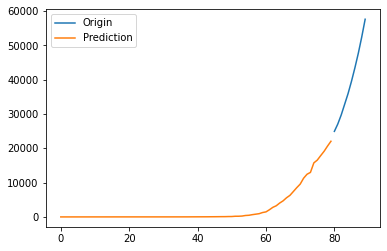

In [104]:
Canada_sum_list=[]
for i in range(Canada_sum.shape[1]):
  Canada_sum_list.append(int(Canada_sum[0][i]))
for i in range(len(output)):
  output[i]=float(output[i])
plt.plot([80,81,82,83,84,85,86,87,88,89],output)
plt.plot(Canada_sum_list)
plt.legend(['Origin', 'Prediction'], loc='upper left')
plt.show()